# Statical concept about Parameter Estimation
## Theory and Background

## What is Parameter Estimation
Parameter estimation refers to the process of estimating the parameters of a population
distribution based on sample data. In statistics, we usually assume the form of the population
 distribution, such as normal distribution, Poisson distribution, etc.,
 and assume that the parameters of the population distribution are unknown.
 The goal of parameter estimation is to estimate the parameters of the overall distribution
 through a certain method based on sample data.

### Why this is important
Parameter estimation is fundamental in statistics, machine learning, and data science because it allows us to make informed decisions based on limited data. Since we rarely have access to an entire population, we rely on sample data to infer key characteristics of the population.



## Abstract
The Notebook is a introductio about statical concept about the Parameter Estimation, to give it a brief ideal of what it parameter Estimation and how we do the Parameter Estimation using different method like Maximum Likelihood Estimation(MLE),Maximum A Posteriori Estimation (MAP),Bayesian Inference. It will give a detail step of how we do this three Parameter Estimation in an example database and conclude when we should use them.

## Parameter Estimation in normal distrbution dataset
For this we are using the Iris dataset<br>
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are not linearly separable from each other.

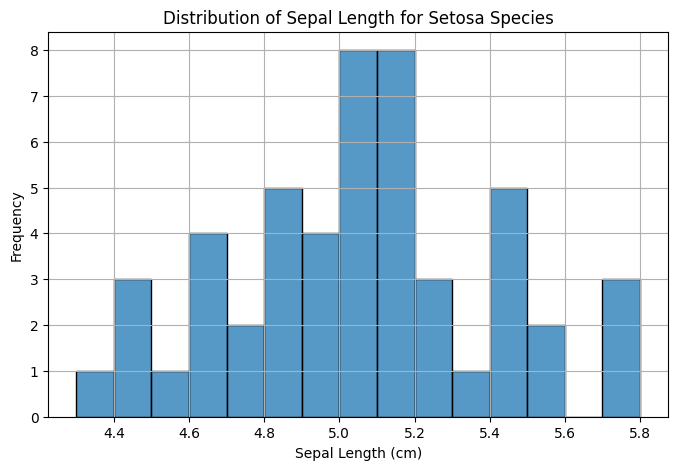

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target_names[iris.target]

setosa_sepal_length = data[data['species'] == 'setosa']['sepal length (cm)']
plt.figure(figsize=(8, 5))
sns.histplot(setosa_sepal_length, bins=15)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Sepal Length for Setosa Species')
plt.grid(True)
plt.show()

As we can see for setosa_sepal_length it seems to follow the normal distribution
so we assum that the distribution of setosa_sepal_length is normal distribution
### Using MLE for parameter Estimation

In [2]:
mu_mle = np.mean(setosa_sepal_length)
sigma2_mle = np.var(setosa_sepal_length, ddof=0)


print(f"MLE estimation setosa_sepal_length Mean: {mu_mle:.2f}, Variance: {sigma2_mle:.2f}")

MLE estimation setosa_sepal_length Mean: 5.01, Variance: 0.12


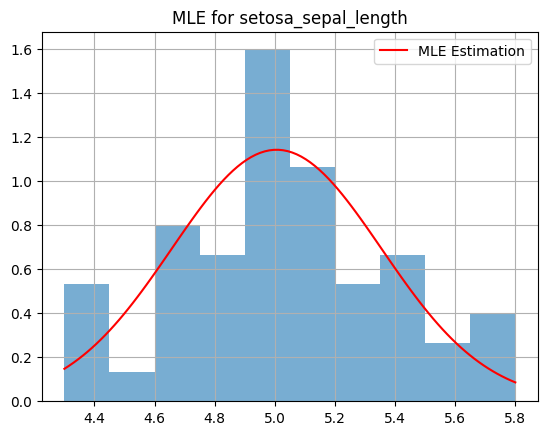

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, invgamma

plt.hist(setosa_sepal_length, bins=10, density=True, alpha=0.6)
x = np.linspace(setosa_sepal_length.min(), setosa_sepal_length.max(), 100)
pdf = stats.norm.pdf(x, mu_mle, np.sqrt(sigma2_mle))
plt.plot(x, pdf, 'r-', label='MLE Estimation')
plt.title("MLE for setosa_sepal_length")
plt.grid(True)
plt.legend()
plt.show()

### Using MAP for parameter Estimation
For MAP we need to first give out the priori hypothesis
<br> we assum that the distribution have the mean of 5

MAP estimation setosa_sepal_length Mean: 5.01, Variance: 0.15


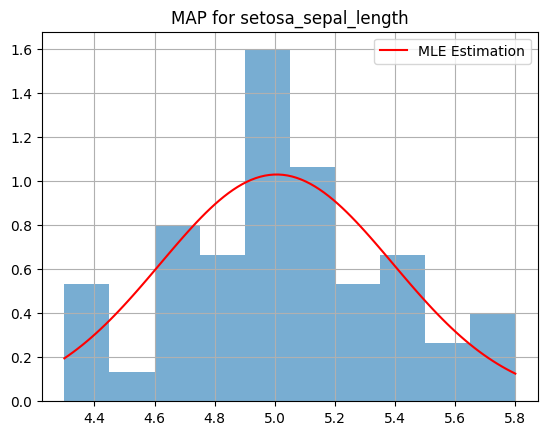

In [4]:
mu_0 = 5.0
kappa_0 = 0.2
alpha_0 = 1.0
beta_0 = 1.0

x = setosa_sepal_length.values
n = len(x)
x_bar = np.mean(x)
s_sq = np.var(x, ddof=0)

kappa_n = kappa_0 + n
mu_n = (kappa_0 * mu_0 + n * x_bar) / kappa_n
alpha_n = alpha_0 + n / 2
beta_n = beta_0 + 0.5 * n * s_sq + 0.5 * (kappa_0 * n * (x_bar - mu_0)**2) / (kappa_0 + n)


map_mu = mu_n
map_sigma2 = beta_n / (alpha_n + 1)

map_sigma2 = max(map_sigma2, 1e-6)


print(f"MAP estimation setosa_sepal_length Mean: {map_mu:.2f}, Variance: {map_sigma2:.2f}")
plt.hist(setosa_sepal_length, bins=10, density=True, alpha=0.6)
x = np.linspace(setosa_sepal_length.min(), setosa_sepal_length.max(), 100)
pdf = stats.norm.pdf(x, map_mu, np.sqrt(map_sigma2))
plt.plot(x, pdf, 'r-', label='MLE Estimation')
plt.title("MAP for setosa_sepal_length")
plt.grid(True)
plt.legend()
plt.show()


## Using Bayesian parameter estimation
For Bayesian parameter estimation we need posterior hypothesis
so we use the same assumption with MAP
<br>the distribution have the mean of 5
<br>And we still need posterior standard deviation

Bayesian parameter estimation setosa_sepal_length Mean: 5.01, Variance: 0.16


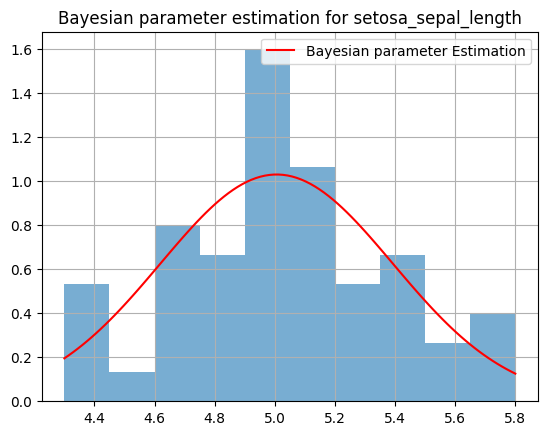

In [5]:
setosa_sepal_length = data[data['species'] == 'setosa']['sepal length (cm)']
x = setosa_sepal_length.values
n = len(x)
x_bar = np.mean(x)
s_sq = np.var(x, ddof=0)

mu_0 = 5.0
kappa_0 = 0.2
alpha_0 = 1.0
beta_0 = 1.0

kappa_n = kappa_0 + n
mu_n = (kappa_0 * mu_0 + n * x_bar) / kappa_n
alpha_n = alpha_0 + n / 2
beta_n = beta_0 + 0.5 * n * s_sq + 0.5 * (kappa_0 * n * (x_bar - mu_0)**2) / (kappa_0 + n)

np.random.seed(42)
sigma2_samples = invgamma.rvs(a=alpha_n, scale=beta_n, size=10000)

mu_samples = np.zeros_like(sigma2_samples)
for i in range(len(sigma2_samples)):
    mu_var = sigma2_samples[i] / kappa_n
    mu_samples[i] = norm.rvs(loc=mu_n, scale=np.sqrt(mu_var))

bayesian_mu = np.mean(mu_samples)
bayesian_var = np.mean(sigma2_samples)

print(f"Bayesian parameter estimation setosa_sepal_length Mean: {bayesian_mu:.2f}, Variance: {bayesian_var:.2f}")
plt.hist(setosa_sepal_length, bins=10, density=True, alpha=0.6)
x = np.linspace(setosa_sepal_length.min(), setosa_sepal_length.max(), 100)
pdf = stats.norm.pdf(x, map_mu, np.sqrt(map_sigma2))
plt.plot(x, pdf, 'r-', label='Bayesian parameter Estimation')
plt.title("Bayesian parameter estimation for setosa_sepal_length")
plt.grid(True)
plt.legend()
plt.show()

## Compare Three method of Parameter Estimation

MLE: μ=5.01, σ²=0.12
MAP: μ=5.01, σ²=0.15
Bay: μ=5.01, σ²=0.16


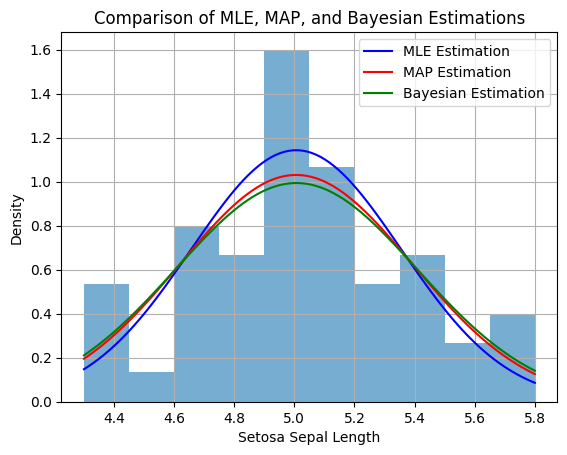

In [6]:
print(f"MLE: μ={mu_mle:.2f}, σ²={sigma2_mle:.2f}")
print(f"MAP: μ={map_mu:.2f}, σ²={map_sigma2:.2f}")
print(f"Bay: μ={bayesian_mu:.2f}, σ²={bayesian_var:.2f}")


plt.hist(setosa_sepal_length, bins=10, density=True, alpha=0.6)
x = np.linspace(setosa_sepal_length.min(), setosa_sepal_length.max(), 100)

pdf = stats.norm.pdf(x, mu_mle, np.sqrt(sigma2_mle))
plt.plot(x, pdf, 'b-', label='MLE Estimation')

pdf_map = stats.norm.pdf(x, map_mu, np.sqrt(map_sigma2))
plt.plot(x, pdf_map, 'r-', label='MAP Estimation')

pdf_bayesian = stats.norm.pdf(x, bayesian_mu, np.sqrt(bayesian_var))
plt.plot(x, pdf_bayesian, 'g-', label='Bayesian Estimation')

plt.title("Comparison of MLE, MAP, and Bayesian Estimations")
plt.xlabel("Setosa Sepal Length")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()

## When we use different Parameter Estimation
### Maximum Likelihood Estimation (MLE)


#### Key Points:
Rely entirely on data and find parameter values ​​that maximize the probability of observing data.
#### Applicable scenarios
- *Large Datasets:* The asymptotic properties of MLE are most reliable with ample data.
- *No Prior Information:* When you lack strong prior beliefs or wish to remain completely data-driven.
#### Limitation
- It is easy to overfit in small samples
- Uncertainty in parameters cannot be quantified.

###  Maximum A Posteriori (MAP) Estimation

#### Key Points:
Introduce the prior distribution based on MLE and find the parameter value that maximizes the posterior probability
#### Applicable scenarios
- *Small Datasets:* The asymptotic properties of MLE are most reliable with ample data.
- *No Prior Information:* When you lack strong prior beliefs or wish to remain completely data-driven.
#### Limitation
- It is still a point estimate and cannot capture the parameter distribution.
- Improper prior selection may lead to bias.


### Bayesian Estimation

#### Key Points:
Computes the posterior distribution of parameters, providing a complete probabilistic description
#### Applicable scenarios
- *need to quantify parameter uncertainty:*
- *Small sample learning, combined with priors to improve robustness.*
- *the posterior distribution can be updated incrementally.*
- *Generate predictive distributions.*
#### Limitation
- It is still a point estimate and cannot capture the parameter distribution.
- Improper prior selection may lead to bias.

## conclusion
Parameter Estimation can be vary different from models to models, but the main forcures  is to  find the parameters that can make the model represent the real dataset best

# Additional Worked Example with extra dataset
## Parameter Estimation in Liner regression#
##  MLE is Equivalent to OLS in Linear Regression

why MLE is equivalent to OLS in linear regression when the error terms follow a **normal distribution**.

---

## 1. Linear Regression Model Setup

Consider the standard linear regression model:  
$$  
\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}  
$$  
where:  
- $\mathbf{y}$: $n \times 1$ vector of response variables.  
- $\mathbf{X}$: $n \times p$ design matrix of predictors.  
- $\boldsymbol{\beta}$: $p \times 1$ vector of coefficients to estimate.  
- $\boldsymbol{\varepsilon}$: $n \times 1$ vector of error terms.  

**Key Assumptions**:  
1. The errors $\varepsilon_i$ are **independent and identically distributed (i.i.d.)**.  
2. The errors follow a **normal distribution**: $\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$.  

---

## 2. Ordinary Least Squares (OLS)

OLS aims to minimize the **sum of squared residuals**:  
$$  
\min_{\boldsymbol{\beta}} \sum_{i=1}^n \left( y_i - \mathbf{x}_i^T \boldsymbol{\beta} \right)^2  
$$  
Equivalently, in matrix form:  
$$  
\min_{\boldsymbol{\beta}} \left( \mathbf{y} - \mathbf{X}\boldsymbol{\beta} \right)^T \left( \mathbf{y} - \mathbf{X}\boldsymbol{\beta} \right)  
$$  
The closed-form OLS estimator is:  
$$  
\hat{\boldsymbol{\beta}}_{\text{OLS}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}  
$$  


---

## 3. Why Equivalence Holds

The equivalence arises from two key factors:  
1. **Normality Assumption**: The log-likelihood contains a squared term $(y_i - \mathbf{x}_i^T \boldsymbol{\beta})^2$, which directly links to the OLS objective.  
2. **Additive Objective**: Both methods implicitly minimize the same quadratic form.  

If the normality assumption is violated (e.g., errors follow a Laplace distribution), MLE would no longer reduce to OLS. Instead, MLE would correspond to minimizing absolute deviations.

---
### we will conduct a how to do Parameter Estimation in Liner regression using OLS
The dataset we use is Time-Wasters on Social Media.csv
First we analyze it's parameter and its' correlation to find out whether there could be a liner regression in the dataset


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_squared_error, r2_score
from google.colab import files
from google.colab import drive
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns



In [15]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Time-Wasters on Social Media.csv'
df = pd.read_csv(file_path)

correlation_matrix = df[['ProductivityLoss','Age', 'Addiction Level','Time Spent On Video', 'Engagement','Income', 'Number of Videos Watched','Self Control','Total Time Spent','Video Length','Satisfaction']].corr()
correlation_matrix

Mounted at /content/drive


,ProductivityLoss,Age,Addiction Level,Time Spent On Video,Engagement,Income,Number of Videos Watched,Self Control,Total Time Spent,Video Length,Satisfaction
ProductivityLoss,1.000000,-0.031068,-0.994939,0.002339,-0.025050,0.040670,-0.012161,0.994939,-0.014210,-0.004364,-1.000000
Age,-0.031068,1.000000,0.033493,0.034535,0.010417,-0.017923,-0.033776,-0.033493,-0.004166,0.009557,0.031068
Addiction Level,-0.994939,0.033493,1.000000,-0.000447,0.027620,-0.039181,0.013286,-1.000000,0.016086,0.004914,0.994939
Time Spent On Video,0.002339,0.034535,-0.000447,1.000000,-0.040716,-0.041666,-0.043196,0.000447,0.053319,0.004256,-0.002339
Engagement,-0.025050,0.010417,0.027620,-0.040716,1.000000,-0.017183,-0.000719,-0.027620,-0.033743,0.001286,0.025050
Income,0.040670,-0.017923,-0.039181,-0.041666,-0.017183,1.000000,-0.036211,0.039181,0.013326,0.017432,-0.040670
Number of Videos Watched,-0.012161,-0.033776,0.013286,-0.043196,-0.000719,-0.036211,1.000000,-0.013286,-0.020969,0.037753,0.012161
Self Control,0.994939,-0.033493,-1.000000,0.000447,-0.027620,0.039181,-0.013286,1.000000,-0.016086,-0.004914,-0.994939
Total Time Spent,-0.014210,-0.004166,0.016086,0.053319,-0.033743,0.013326,-0.020969,-0.016086,1.000000,0.068607,0.014210
Video Length,-0.004364,0.009557,0.004914,0.004256,0.001286,0.017432,0.037753,-0.004914,0.068607,1.000000,0.004364


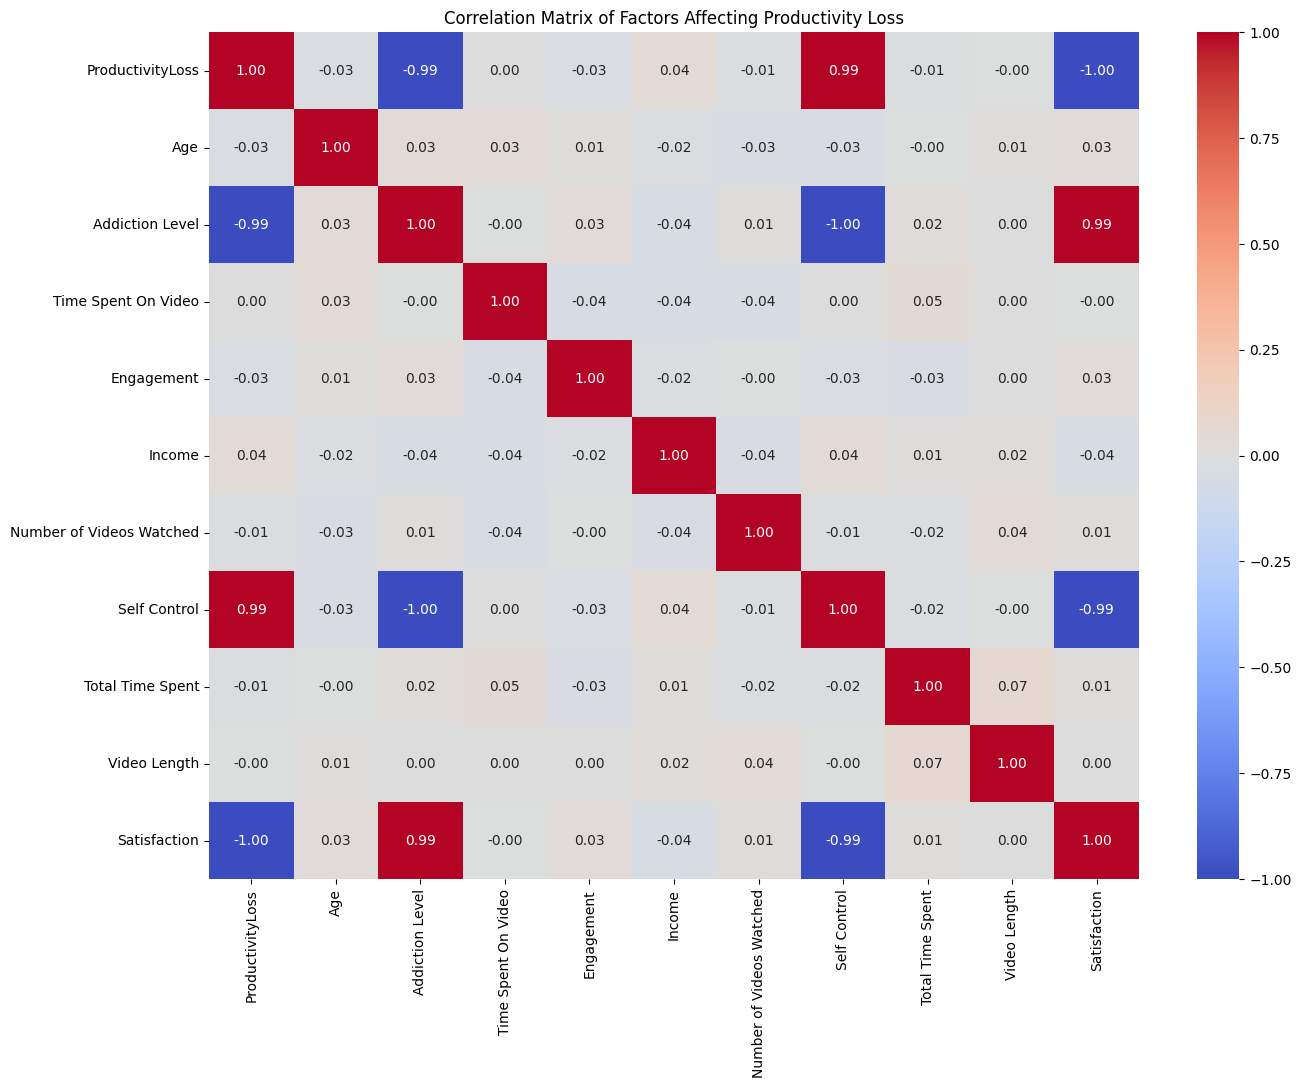

In [16]:
correlation_matrix = df[['ProductivityLoss','Age', 'Addiction Level','Time Spent On Video', 'Engagement','Income', 'Number of Videos Watched','Self Control','Total Time Spent','Video Length','Satisfaction']].corr()
correlation_matrix
plt.figure(figsize=(15, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Factors Affecting Productivity Loss')
plt.show()

We oculd find out that ProductivityLoss and Productivity Loss have strong correlation we trying to do the LinearRegression with OLS


model.coef: [-1.02576135]
model.intercept: 8.116862469774384
(MSE): 0.06707369591837722
(R²): 0.9863891434972945


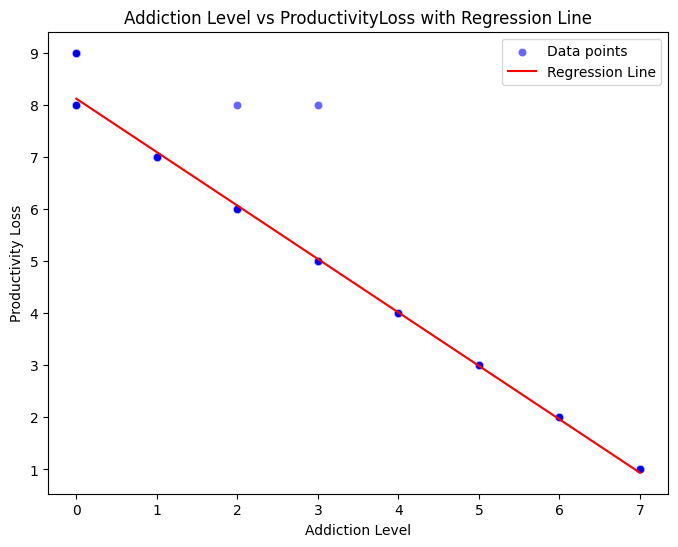

In [17]:
from sklearn.linear_model import LinearRegression
X = df[['Addiction Level']]
y = df['ProductivityLoss']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the LinearRegression model (OLS is used by default)
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X_test)
print(f"model.coef: {model.coef_}")
print(f"model.intercept: {model.intercept_}")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"(MSE): {mse}")
print(f"(R²): {r2}")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Addiction Level', y='ProductivityLoss', data=df, color='blue', alpha=0.6, label='Data points')
sns.lineplot(x=X_test.squeeze(), y=y_pred, color='red', label='Regression Line')
plt.title('Addiction Level vs ProductivityLoss with Regression Line')
plt.xlabel('Addiction Level')
plt.ylabel('Productivity Loss')
plt.legend()
plt.show()

## conclusion
In Liner regression the parameter Estimation MLE is used as OLS which can easily help us find the regression parameter for the model

## References:
irs dataset : https://archive.ics.uci.edu/dataset/53/iris
<br>MLE MAP Bayesian Estimation expalination :https://www.geeksforgeeks.org/parameter-estimation/
kaggle datasettime-wasters-on-social-media-data-analysis: https://www.kaggle.com/code/s1f0gaming/time-wasters-on-social-media-data-analysis